In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import utils.plot_utils as plu
from tqdm import tqdm
import numpy as np
import pickle
from signal_processing import sr_processing as sr
from hu_classes.hu_dataloader import matrics_loader
import signal_processing.subsetter as sset
import numpy as np
from utils import plot_utils as plu
import utils.data_extraction as datrac
import pandas as pd
import utils.summarize as summer 

In [4]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
post, pre = sset.find_directories_with_rfmapping(dat_spike_paths)
save_path = '/home/tony/Halluci-Nations/results'

In [88]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    df_ep_path = os.path.join(session_path,'epochs.pkl')
    df_ep = pd.read_pickle(df_ep_path)
    spiketimes_dic = {}
    df_ep = df_ep[df_ep['stim_name'].str.contains('Spon')]
    for stim in df_ep.stim_name.values:
        start_time =  df_ep[df_ep['stim_name']==stim]['start_time'].iloc[0]+10
        stop_time =  df_ep[df_ep['stim_name']==stim]['stop_time'].iloc[0]-20
        neuron_spikes = df_analysis[f'{stim}_spikes'].values
        duration = stop_time - start_time
        filtered_spikes = [datrac.filter_with_numpy(ns, start_time, stop_time) for ns in neuron_spikes]
        filtered_spikes.append(duration)
        spiketimes_dic[stim] = filtered_spikes
    save_path =os.path.join(session_path,'spon.pkl')

    with open(save_path, 'wb') as f:
        
        # 3. Dump the object into the file handle `f`
        pickle.dump(spiketimes_dic, f)

    pbar.update(1)

100%|██████████| 11/11 [00:04<00:00,  2.74it/s]

In [90]:
#session_path = os.path.join(dat_spike_paths,session)
session_path = '/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22'
df_path =os.path.join(session_path,'data.pkl')
df_analysis = pd.read_pickle(df_path)
df_ep_path = os.path.join(session_path,'epochs.pkl')
df_ep = pd.read_pickle(df_ep_path)
spiketimes_dic = {}
df_ep = df_ep[df_ep['stim_name'].str.contains('Spon')]
for stim in df_ep.stim_name.values:
    start_time =  df_ep[df_ep['stim_name']==stim]['start_time'].iloc[0]+10
    stop_time =  df_ep[df_ep['stim_name']==stim]['stop_time'].iloc[0]-20
    neuron_spikes = df_analysis[f'{stim}_spikes'].values
    duration = stop_time - start_time
    filtered_spikes = [datrac.filter_with_numpy(ns, start_time, stop_time) for ns in neuron_spikes]
    filtered_spikes.append(duration)
    spiketimes_dic[stim] = filtered_spikes
save_path =os.path.join(session_path,'spon.pkl')

with open(save_path, 'wb') as f:
    
    # 3. Dump the object into the file handle `f`
    pickle.dump(spiketimes_dic, f)

pbar.update(1)

True

In [23]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    spon_dic_path = os.path.join(session_path,'spon.pkl')
    df_ep_path = os.path.join(session_path,'epochs.pkl')
    df_ep = pd.read_pickle(df_ep_path)
    df_ep = df_ep[df_ep['stim_name'].str.contains('Spon')]
    data = datrac.load_pickle(spon_dic_path)
    data_ult = {}
    print(session_path)
    for stim in df_ep.stim_name.values:
        temp_dic = {}
        end_time = data[stim][-1]
        spikes = data[stim][:-1]
        binned_results = {
            'binned_spikes': [],
            'spike_rates': [],
            'bin_centers': None,  # Will be the same for all neurons, so we only store it once
            'bin_edges': None     # Also the same for all neurons
        }
        for neuron_spike_times in spikes:
            # Call your function for the current neuron
            binned, rates, centers, edges = datrac.bin_spikes(neuron_spike_times, end_time, 10)
            # Append the results for this neuron to the lists in your dictionary
            binned_results['binned_spikes'].append(binned)
            binned_results['spike_rates'].append(rates)
            # Since bin_centers and bin_edges are the same for every neuron,
            # we can just save them from the first iteration.
            if binned_results['bin_centers'] is None:
                binned_results['bin_centers'] = centers
                binned_results['bin_edges'] = edges
        binned_results['spike_rates'].append(centers)

        data_ult[stim] = binned_results['spike_rates']
        save_path =os.path.join(session_path,'spike_rates_spon.pkl')
        with open(save_path, 'wb') as f:
            # 3. Dump the object into the file handle `f`
            pickle.dump(data_ult, f)
    pbar.update(1)
    

  0%|          | 0/11 [00:31<?, ?it/s]


/home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-06_12-32-42_nwb_2025-08-03_21-11-22


 18%|█▊        | 2/11 [00:01<00:05,  1.79it/s]

/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-05_12-36-57_nwb_2025-08-03_21-11-22


 27%|██▋       | 3/11 [00:01<00:03,  2.40it/s]

/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-04_13-01-40_nwb_2025-08-03_21-11-22


 36%|███▋      | 4/11 [00:01<00:03,  2.33it/s]

/home/tony/Halluci-Nations/scratch/ecephys_730049_2024-06-14_12-07-57_nwb_2025-08-03_21-11-22
/home/tony/Halluci-Nations/scratch/ecephys_730049_2024-06-13_12-53-21_nwb_2025-08-03_21-11-22


 45%|████▌     | 5/11 [00:02<00:03,  1.96it/s]

/home/tony/Halluci-Nations/scratch/ecephys_714789_2024-05-16_13-16-59_nwb_2025-08-03_21-11-22


 64%|██████▎   | 7/11 [00:03<00:01,  2.09it/s]

/home/tony/Halluci-Nations/scratch/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22


 73%|███████▎  | 8/11 [00:03<00:01,  2.26it/s]

/home/tony/Halluci-Nations/scratch/ecephys_729461_2024-06-11_12-30-16_nwb_2025-08-03_21-11-22


 82%|████████▏ | 9/11 [00:04<00:00,  2.24it/s]

/home/tony/Halluci-Nations/scratch/ecephys_729461_2024-06-10_12-51-54_nwb_2025-08-03_21-11-22


 91%|█████████ | 10/11 [00:04<00:00,  2.45it/s]

/home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-07_12-00-57_nwb_2025-08-03_21-11-22


100%|██████████| 11/11 [00:04<00:00,  2.81it/s]

/home/tony/Halluci-Nations/scratch/ecephys_714527_2024-05-14_13-22-07_nwb_2025-08-03_21-11-22


In [2]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session)
    df_path =os.path.join(session_path,'data.pkl')
    df_analysis = pd.read_pickle(df_path)
    spike_rates_dic_path = os.path.join(session_path,'spike_rates_spon.pkl')
    df_ep_path = os.path.join(session_path,'epochs.pkl')
    df_ep = pd.read_pickle(df_ep_path)
    df_ep = df_ep[df_ep['stim_name'].str.contains('Spon')]
    data = datrac.load_pickle(spike_rates_dic_path )
    data_ult = {}
    for stim in df_ep.stim_name.values:
        end_time = data[stim][-1]
        spikes = np.array(data[stim][:-1])
        spikes_zscored = sr.spike_rate_zscore(spikes)
        corr_map = sr.get_corr_mat(spikes_zscored)
        data_ult[stim] = corr_map
    save_path =os.path.join(session_path,'spon_coor_maps.pkl')

    with open(save_path, 'wb') as f:
        # 3. Dump the object into the file handle `f`
        pickle.dump(data_ult, f)
    pbar.update(1)

100%|██████████| 11/11 [00:06<00:00,  3.03it/s]

In [106]:
test = sr.get_corr_mat(spikes_zscored)

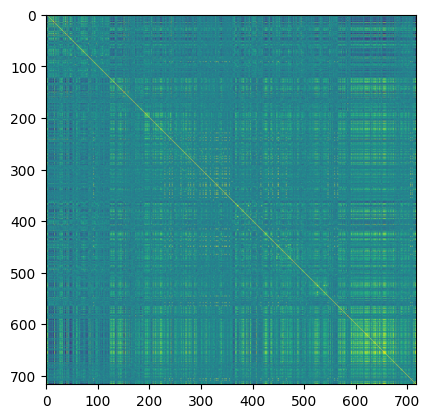

In [108]:
plt.imshow(test)

In [37]:
end_time 

array([  4.91987574,  14.75962722,  24.5993787 ,  34.43913019,
        44.27888167,  54.11863315,  63.95838463,  73.79813611,
        83.63788759,  93.47763908, 103.31739056, 113.15714204,
       122.99689352, 132.836645  , 142.67639648, 152.51614797,
       162.35589945, 172.19565093, 182.03540241, 191.87515389,
       201.71490537, 211.55465686, 221.39440834, 231.23415982,
       241.0739113 , 250.91366278, 260.75341427, 270.59316575,
       280.43291723, 290.27266871, 300.11242019, 309.95217167,
       319.79192316, 329.63167464, 339.47142612, 349.3111776 ,
       359.15092908, 368.99068056, 378.83043205, 388.67018353,
       398.50993501, 408.34968649, 418.18943797, 428.02918945,
       437.86894094, 447.70869242, 457.5484439 , 467.38819538,
       477.22794686, 487.06769834, 496.90744983, 506.74720131,
       516.58695279, 526.42670427, 536.26645575, 546.10620723,
       555.94595872, 565.7857102 ])

In [36]:
sorted_labels

array(['MOs', 'MOs', 'MOs', ..., 'scwm', 'scwm', 'scwm'],
      shape=(1101,), dtype=object)

In [71]:
def plot_sorted_neurons(data, labels, time_info,title):
    """
    Plots sorted neural data as a compact heatmap with grouped labels on the y-axis.
    
    Args:
        data (np.ndarray): The 2D array of neural data (neurons x timepoints).
        labels (np.ndarray): The 1D array of sorted labels corresponding to the neurons.
        time_info (float or np.ndarray): The total duration (a single float) or 
                                         an array of timestamps for the x-axis.
    """
    # --- ROBUST FIX IS HERE ---
    # Check if time_info is an array/list. If so, take its maximum value.
    if hasattr(time_info, "__len__"): # A simple way to check if it's a sequence
        end_time = np.max(time_info)
    else: # Otherwise, assume it's already a scalar number
        end_time = float(time_info)
    # ---------------------------
    
    num_neurons, num_timepoints = data.shape
    
    fig, ax = plt.subplots(figsize=(12, 7))

    im = ax.imshow(
        data,
        aspect='auto',
        cmap='viridis',
        interpolation='none',
        vmax= 5,
        vmin=-1,
        extent=[0, end_time, 0, num_neurons] # Now end_time is guaranteed to be a scalar
    )

    # ... the rest of the function remains exactly the same ...
    
    unique_labels, label_indices = np.unique(labels, return_index=True)
    tick_locations = label_indices + np.diff(np.append(label_indices, num_neurons)) / 2
    
    ax.set_yticks(tick_locations)
    ax.set_yticklabels(unique_labels)
    ax.set_ylabel("Neuron by Region")
    
    for idx in label_indices[1:]:
        ax.axhline(y=idx, color='white', lw=0.5, linestyle='--')

    ax.set_xlabel("Time (s)")
    ax.set_title(f"")
    
    cbar = fig.colorbar(im, ax=ax, pad=0.02)
    c_label = cbar.set_label("Neural Activity (e.g., Z-Scored Rate)")

    plt.tight_layout()


In [98]:
session_path = '/home/tony/Halluci-Nations/scratch/ecephys_717036_2024-06-07_12-00-57_nwb_2025-08-03_21-11-22'
spike_rates_dic_path = os.path.join(session_path,'spike_rates_spon.pkl')
df_ep = df_ep[df_ep['stim_name'].str.contains('Spon')]
data = datrac.load_pickle(spike_rates_dic_path )
df_path =os.path.join(session_path,'data.pkl')
df_analysis = pd.read_pickle(df_path)

In [103]:
stim = 'Spontaneous_2'
end_time = data[stim][-1]
spikes = np.array(data[stim][:-1])
spikes_zscored = sr.spike_rate_zscore(spikes)
region = df_analysis.region.values
layer = df_analysis.layer.values

sorted_indices = np.lexsort((layer, region))

sorted_regions = region[sorted_indices]
sorted_layers = layer[sorted_indices]
sorted_neural_data = spikes_zscored[sorted_indices, :]


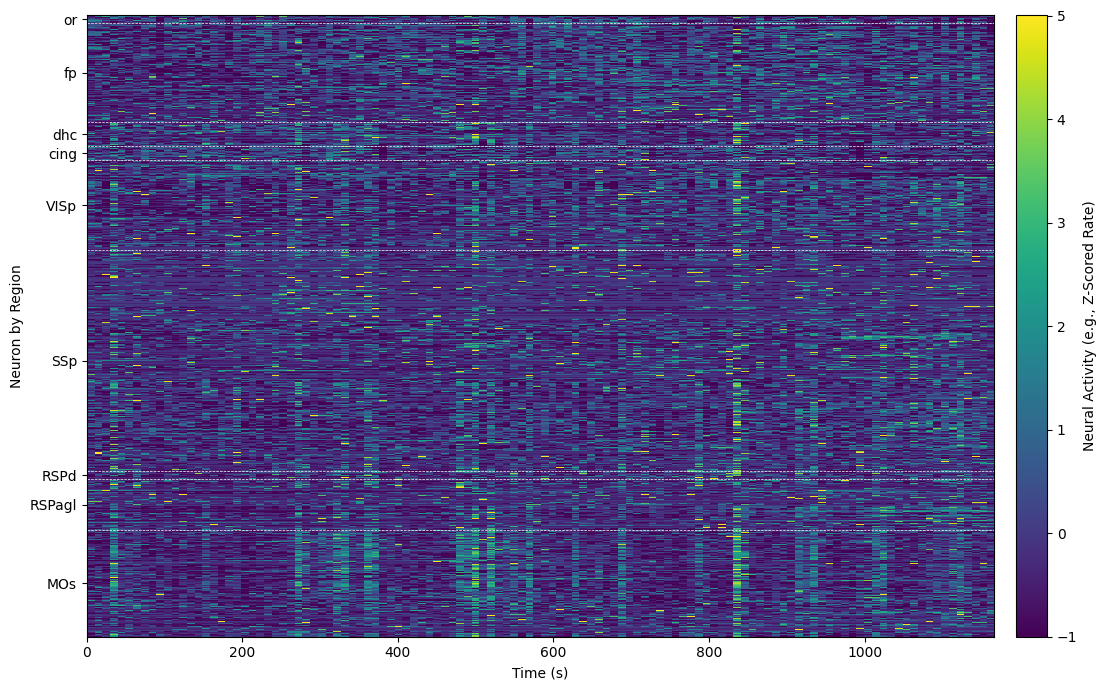

In [104]:
plot_sorted_neurons(sorted_neural_data,sorted_regions,end_time,'psy_pre')
plt.savefig('/home/tony/Halluci-Nations/results/psy_late_spon_demo.svg')